In [22]:
import pandas as pd
import numpy as np
import joblib
import os
from time import time

import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [23]:
# Load data
x_tr_resample = pd.read_csv('../../Data/fix/X_train_smote.csv')
y_tr_resample = np.loadtxt("../../Data/fix/y_train_smote.csv", delimiter=",")

In [24]:
# Define Normalisasi
minmax = MinMaxScaler()
x_minmax_scaled = minmax.fit_transform(x_tr_resample)
joblib.dump(minmax, "../../Models/Default/minmax.pkl")

pt = PowerTransformer()
x_pt_scaled = pt.fit_transform(x_tr_resample)
joblib.dump(pt, "../../Models/Default/powertransformer.pkl")

['../../Models/Default/powertransformer.pkl']

In [25]:
# Define models
models = {
    "LGBM": LGBMClassifier(n_estimators=100, random_state=42, verbose=-1, force_col_wise=True),
    "ETC": ExtraTreesClassifier(n_estimators=500, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', C=1, random_state=42),
    "GNB": GaussianNB(var_smoothing=1e-09),
    "CATBOOST": CatBoostClassifier(iterations=1000, random_state=42, logging_level='Silent',
    allow_writing_files=False)
}

In [26]:
# Directory untuk menyimpan model
model_dir = "../../Models/Default"
os.makedirs(model_dir, exist_ok=True)

In [27]:
# Training loop
training_results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Waktu untuk training
    start_time = time()
    if name == "SVM":
        model.fit(x_minmax_scaled, y_tr_resample)
    elif name == "GNB":
        model.fit(x_pt_scaled, y_tr_resample)
    else:
        model.fit(x_tr_resample, y_tr_resample)
    end_time = time()

    # Hitung waktu training
    training_time = end_time - start_time

    # Save model
    model_path = os.path.join(model_dir, f"MODEL-{name}.pkl")
    joblib.dump(model, model_path)
    print(f"{name} model saved at {model_path}")

    # Simpan hasil training (nama model dan waktu)
    training_results.append([name, training_time])
    print(f"{name} training completed. Training time: {training_time:.4f} seconds")

Training LGBM...
LGBM model saved at ../../Models/Default\MODEL-LGBM.pkl
LGBM training completed. Training time: 0.0726 seconds
Training ETC...
ETC model saved at ../../Models/Default\MODEL-ETC.pkl
ETC training completed. Training time: 1.1283 seconds
Training SVM...
SVM model saved at ../../Models/Default\MODEL-SVM.pkl
SVM training completed. Training time: 1.3540 seconds
Training GNB...
GNB model saved at ../../Models/Default\MODEL-GNB.pkl
GNB training completed. Training time: 0.0060 seconds
Training CATBOOST...
CATBOOST model saved at ../../Models/Default\MODEL-CATBOOST.pkl
CATBOOST training completed. Training time: 3.9060 seconds


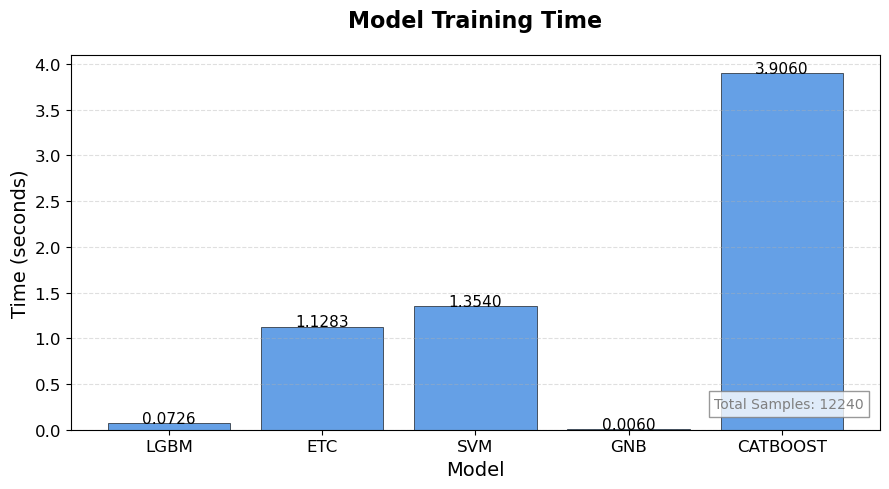

In [29]:
results_df = pd.DataFrame(training_results, columns=["Model", "Time (s)"])

# 2. Bar Plot Waktu Komputasi
plt.figure(figsize=(9, 5))
bars = plt.bar(results_df["Model"], results_df["Time (s)"],
               color='#4A90E2', alpha=0.85, edgecolor='black', linewidth=0.5)
plt.title('Model Training Time', fontsize=16, pad=20, weight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f'{height:.4f}',
             ha='center', fontsize=11, color='black', weight='medium')

plt.text(0.98, 0.05, f'Total Samples: {len(y_tr_resample)}',
         transform=plt.gca().transAxes, fontsize=10, color='gray',
         ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
# plt.savefig("prediction_time_test.png", dpi=300, bbox_inches='tight')
plt.show()
# print("✅ Bar plot waktu komputasi disimpan di 'prediction_time_test.png'")